In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_ramses import Brug

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](../figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(0.7, 0.35, 1, 1, 0.05, 0.05, 6)
brug.__dict__

{'h1': 0.7,
 'h2': 0.35,
 'd1a': 1,
 'd2a': 1,
 'd1b': 0.05,
 'd2b': 0.05,
 'N': 6,
 'cosa': 0.9445871380254132,
 'sina': 0.3282607784627322,
 'cosb': 0.9852373859857193,
 'sinb': 0.17119373018900796}

In [4]:
brug.calc_reactie_krachten()

[58.75714285714285,
 117.5142857142857,
 250.84761904761905,
 184.18095238095236,
 117.5142857142857,
 117.5142857142857,
 117.5142857142857,
 58.75714285714285]

In [5]:
brug.calc_touw_kracht()

([238.6604257436484,
  509.4478445305095,
  374.05413513707884,
  238.6604257436484,
  238.6604257436484,
  238.6604257436484],
 [228.81345320404552,
  488.4283608024439,
  358.6209070032447,
  228.81345320404552,
  228.81345320404552,
  228.81345320404552])

In [6]:
brug.calc_kant()

(-478.09977324263025,
 -1736.286880466472,
 (225.43556851311948,
  484.8330608398049,
  363.828105788666,
  240.24854498619237,
  251.16648861570476,
  264.542572794422),
 -239.04988662131512,
 -1736.2868804664722,
 (225.4355685131195,
  482.1242176895808,
  355.9811140734647,
  229.22857043815608,
  232.13583935706865,
  235.8210971654107))

### Wegdek

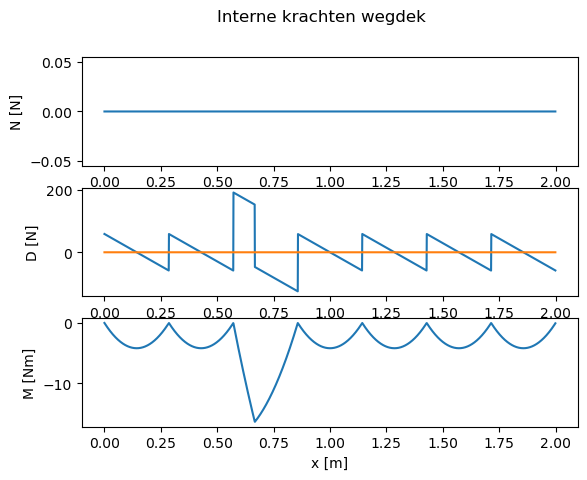

In [7]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten wegdek")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N [N]")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D [N]")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M [Nm]")
ax3.set_xlabel("x [m]")
plt.savefig("figs/wegdek-ramses")

### Doorbuiging wegdek

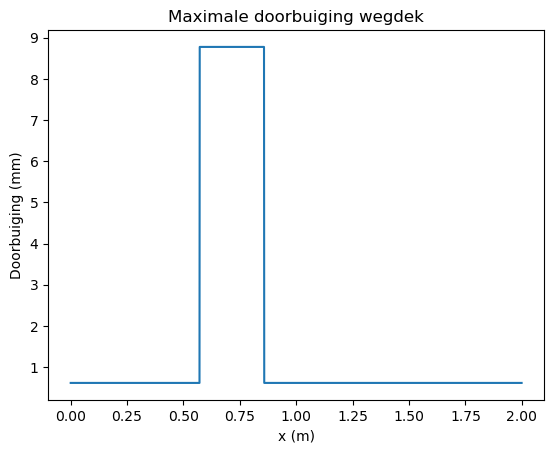

In [8]:
x = np.arange(0, 2, 0.001)
f = [brug.calc_doorbuiging_wegdek(xi)*10**3 for xi in x]

plt.plot(x, f)
plt.title("Maximale doorbuiging wegdek")
plt.xlabel("x (m)")
plt.ylabel("Doorbuiging (mm)")
plt.savefig("figs/wegdek-doorbuiging-ramses")

### Piloon 1

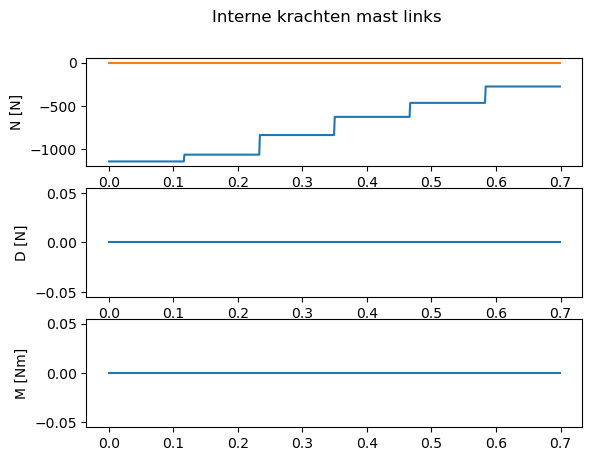

In [9]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten mast links")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N [N]")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D [N]")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M [Nm]")
plt.savefig("figs/piloon1-ramses")

### Piloon 2

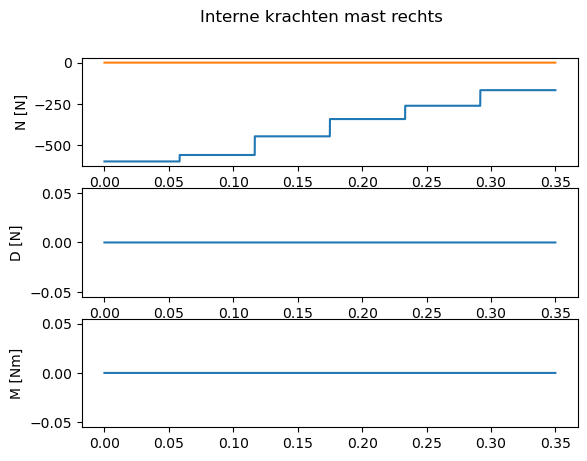

In [10]:
x = np.arange(0, brug.h2, 0.0001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten mast rechts")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N [N]")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D [N]")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M [Nm]")
plt.savefig("figs/piloon2-ramses")

### Traagheidsmoment

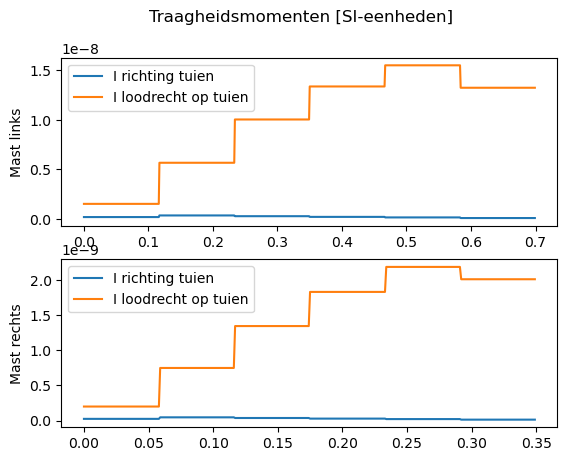

In [11]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
I1 = [brug.calc_piloon_I(xi, True) for xi in x1]
x2 = np.arange(0, brug.h2, step)
I2 = [brug.calc_piloon_I(xi, False) for xi in x2]

fig = plt.figure()
fig.suptitle("Traagheidsmomenten [SI-eenheden]")
ax1 = plt.subplot(2,1,1)
ax1.plot(x1, I1)
ax1.set_ylabel("Mast links")
ax1.legend(["I richting tuien", "I loodrecht op tuien"], loc="upper left")
ax2 = plt.subplot(2,1,2)
ax2.plot(x2, I2)
ax2.set_ylabel("Mast rechts")
ax2.legend(["I richting tuien", "I loodrecht op tuien"], loc="upper left")
plt.savefig("figs/traagheid-ramses")

### Kleine balk uit I

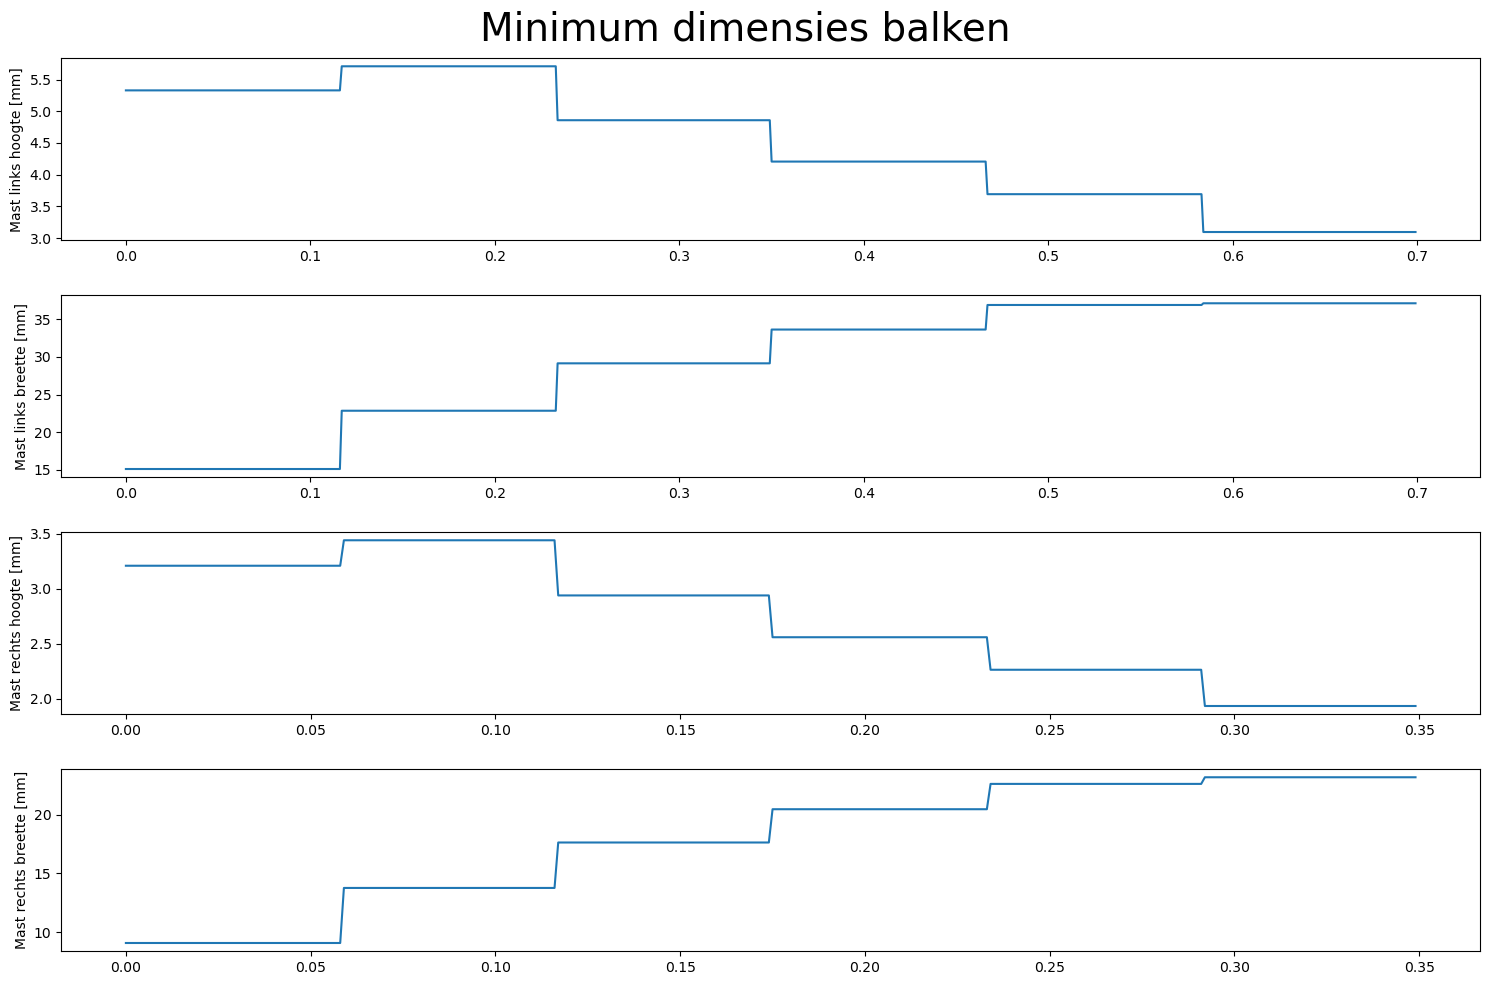

In [18]:
step = 0.001

x1 = np.arange(0, brug.h1, step)
hb1 = list(zip(*[brug.calc_piloon_balk(xi, True) for xi in x1]))
x2 = np.arange(0, brug.h2, step)
hb2 = list(zip(*[brug.calc_piloon_balk(xi, False) for xi in x2]))

fig = plt.figure(figsize=(15, 10))
fig.suptitle("Minimum dimensies balken", size=28)

ax1 = plt.subplot(4,1,1)
ax1.plot(x1, [h1*1000 for h1 in hb1[0]])
ax1.set_ylabel("Mast links hoogte [mm]")
ax2 = plt.subplot(4,1,2)
ax2.plot(x1, [b1*1000 for b1 in hb1[1]])
ax2.set_ylabel("Mast links breette [mm]")
ax3 = plt.subplot(4,1,3)
ax3.plot(x2, [h2*1000 for h2 in hb2[0]])
ax3.set_ylabel("Mast rechts hoogte [mm]")
ax4 = plt.subplot(4,1,4)
ax4.plot(x2, [b2*1000 for b2 in hb2[1]])
ax4.set_ylabel("Mast rechts breette [mm]")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("figs/minimum-balk-dim-ramses")